In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_dir = '../../data/render_wave2-pose_600/'

In [3]:
sp = np.load(data_dir+'sparse_512/00000.npy')

In [4]:
sp.shape

(2, 512, 512)

In [5]:
s1 = sp[0]
s2 = sp[1]

MAX:  1.0122284889221191
MIN:  0.9453603029251099


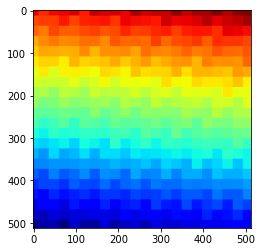

In [6]:
print('MAX: ', np.max(s1))
print('MIN: ', np.min(s1))
plt.imshow(s1, cmap='jet')

MAX:  4.119534287814235
MIN:  0.0


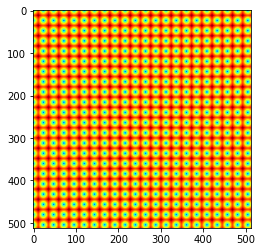

In [7]:
print('MAX: ', np.max(s2))
print('MIN: ', np.min(s2))
plt.imshow(s2, cmap='jet')

In [8]:
def unpack_bmp_bgra_to_float(bmp):
    b = bmp[:, :, 0].astype(np.int32)
    g = bmp[:, :, 1].astype(np.int32) << 16
    r = bmp[:, :, 2].astype(np.int32) << 8
    a = bmp[:, :, 3].astype(np.int32)
    depth = np.ldexp(1.0, b -
                     (128 + 24)) * (g + r + a + 0.5).astype(np.float32)
    return depth

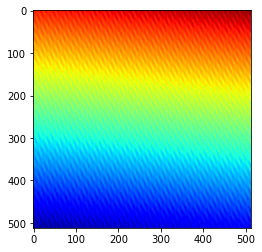

In [9]:
gt_img = cv2.imread(data_dir+'gt_512/00000.bmp', -1)
gt = unpack_bmp_bgra_to_float(gt_img)
plt.imshow(gt, cmap='jet')

MAX:  0.005490899085998535
MIN:  -0.0056149959564208984


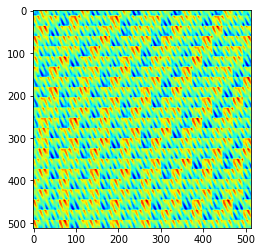

In [10]:
diff = gt - s1
print('MAX: ', np.max(diff))
print('MIN: ', np.min(diff))
plt.imshow(diff, cmap='jet')

In [11]:
out_dir = '../../sp_models/overfit/pred_train/'

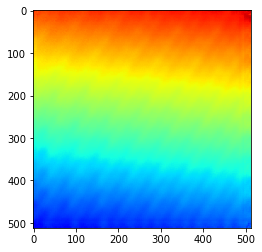

In [12]:
pred_img = cv2.imread(out_dir+'pred_000.bmp', -1)
pred = unpack_bmp_bgra_to_float(pred_img)
plt.imshow(pred, cmap='jet')

MAX:  0.010302543640136719
MIN:  0.0


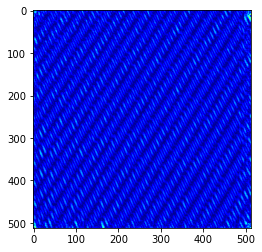

In [15]:
err = np.abs(pred - gt)
print('MAX: ', np.max(err))
print('MIN: ', np.min(err))
plt.imshow(err, cmap='jet')